In [15]:
import datetime
import pandas as pd
from datetime import datetime, timedelta
import FinanceDataReader as fdr
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from fbprophet import Prophet

In [16]:
# finance data reader로부터 전체 Kospi 종목 정보를 가져온다.

df_kospi = fdr.StockListing('KOSPI')
df_kospi.head(2)

,Symbol,Name,Sector,Industry
0,001250,GS글로벌,상품 종합 도매업,"수출입업(시멘트,철강금속,전기전자,섬유,기계화학),상품중개,광업,채석업/하수처리 서..."
1,082740,HSD엔진,일반 목적용 기계 제조업,"대형선박용엔진,내연발전엔진"


In [21]:
# 거래량 급등 종목 조회하여 해당 종목을 List에 저장하는 함수를 작동시킨다. mat20은 거래량 이동평균, map는 가격 이동평균이다.


def m_finder (code, U, L):
    df_stock = fdr.DataReader(code)
    df = pd.DataFrame({'ds':df_stock.index, 'y':df_stock['Volume'],'p':df_stock['Close']})
    df.reset_index(inplace=True)
    del df['Date']
    mat20 = df['y'].rolling(window=20).mean()
    df['mat20']=round(mat20)
    map5 = df['p'].rolling(window=5).mean()
    map20 = df['p'].rolling(window=20).mean()
    map60 = df['p'].rolling(window=60).mean()
    map120 = df['p'].rolling(window=120).mean()
    df['map5']=round(map5)
    df['map20']=round(map20)
    df['map60']=round(map60)
    df['map120']=round(map120)
    df_dick ={}
    if df.tail(2).iloc[1,1] > df.tail(2).iloc[0,3]*L and df.tail(2).iloc[1,1] < df.tail(2).iloc[0,3]*U :
        df_dick['code'] = code
        df_dick['multiple'] = round((df.tail(2).iloc[1,1])/(df.tail(2).iloc[0,3]))
        df_dick['map5'] = round(df.tail(2).iloc[1,4])
        df_dick['map20'] = round(df.tail(2).iloc[1,5])
        df_dick['map60'] = round(df.tail(2).iloc[1,6])
        df_dick['map120'] = round(df.tail(2).iloc[1,7])
        List.append(df_dick)
       
        

In [22]:
# 거래량 급등 종목을 파악하고 코드와 거래 증가량을 찾는다.
# m_finder (종목코드, 최대배수, 최저배수)

List = []

for i in df_kospi['Symbol']:
    m_finder(i,100, 3)
    

# 추후 내재가치 분석을 위해서 코드명만 추출한다.
    
List_code = []

for i in range(0, len(List)):
    a = List[i]['code']
    List_code.append(a)
        
  
    
# 거래량 급등종목의 회사명을 찾는다.  df에서 serise로 전환하고 각 시리즈의 첫번째 value가 회사명이다.  
    
for i in range(0, len(List)):
    a = List[i]['code']
    b = df_kospi.loc[(df_kospi.Symbol == a), 'Name']
    List[i]['Name'] = b.values[0]



List

[{'code': '014160',
  'multiple': 5.0,
  'map5': 1296.0,
  'map20': 1304.0,
  'map60': 1264.0,
  'map120': 1263.0,
  'Name': '대영포장'},
 {'code': '005680',
  'multiple': 6.0,
  'map5': 11610.0,
  'map20': 12085.0,
  'map60': 12436.0,
  'map120': 12322.0,
  'Name': '삼영전자공업'},
 {'code': '064960',
  'multiple': 8.0,
  'map5': 38130.0,
  'map20': 36748.0,
  'map60': 38177.0,
  'map120': 34498.0,
  'Name': 'S&T모티브'},
 {'code': '009190',
  'multiple': 9.0,
  'map5': 7324.0,
  'map20': 7333.0,
  'map60': 6165.0,
  'map120': 5147.0,
  'Name': '대양금속'},
 {'code': '084690',
  'multiple': 3.0,
  'map5': 7674.0,
  'map20': 7918.0,
  'map60': 8377.0,
  'map120': 8272.0,
  'Name': '대상홀딩스'},
 {'code': '009770',
  'multiple': 7.0,
  'map5': 34760.0,
  'map20': 34980.0,
  'map60': 35550.0,
  'map120': 34965.0,
  'Name': '삼정펄프'},
 {'code': '161000',
  'multiple': 4.0,
  'map5': 7868.0,
  'map20': 8422.0,
  'map60': 9128.0,
  'map120': 8918.0,
  'Name': '애경유화'},
 {'code': '000910',
  'multiple': 4.0,
  'map

In [5]:
# 주가 이동평균 배열 확인  map1 : 완전 정배열(ma5>), map2 : 20일 정배열(ma20>), map3 : 60일 정배열 시작(ma60>)

List_map1 = []
List_map2 = []
List_map3 = []

for i in range(0, len(List)):
    if List[i]['map5'] > List[i]['map20'] and List[i]['map20'] > List[i]['map60'] and List[i]['map60'] > List[i]['map120']:
        print("map5 > map20 > map60 > map120 : ", List[i]['code'],List[i]['Name'])
        List_map1.append(List[i]['code'])
    elif List[i]['map20'] > List[i]['map60'] and List[i]['map60'] > List[i]['map120']:
        print("map20 > map60 > map120 : ", List[i]['code'], List[i]['Name'])
        List_map2.append(List[i]['code']) 
    elif List[i]['map60'] > List[i]['map120']:
        print(" map60 > map120 : ", List[i]['code'], List[i]['Name'])
        List_map3.append(List[i]['code'])   
        


map20 > map60 > map120 :  014160 대영포장
 map60 > map120 :  005680 삼영전자공업
 map60 > map120 :  064960 S&T모티브
map20 > map60 > map120 :  009190 대양금속
 map60 > map120 :  084690 대상홀딩스
 map60 > map120 :  009770 삼정펄프
 map60 > map120 :  161000 애경유화
 map60 > map120 :  034300 신세계건설
map20 > map60 > map120 :  004700 조광피혁
 map60 > map120 :  006840 AK홀딩스


In [6]:
# 완전 정배열 종목의 기본정보를 산출한다. ma5>

index_map1 =[]

for i in range(0, len(List_map1)):
    a = df_kospi[(df_kospi.Symbol == List_map1[i])].index.values
    index_map1.append(a)
    

for i in range(0, len(index_map1)):
    a = index_map1[i][0]
    print(df_kospi[a:a+1])
        


In [7]:
# 부분 정배열 종목의 기본정보를 산출한다. ma20>

index_map2 =[]

for i in range(0, len(List_map2)):
    a = df_kospi[(df_kospi.Symbol == List_map2[i])].index.values
    index_map2.append(a)
    

for i in range(0, len(index_map2)):
    a = index_map2[i][0]
    print(df_kospi[a:a+1])

    Symbol  Name                 Sector        Industry
19  014160  대영포장  골판지, 종이 상자 및 종이용기 제조업  골판지원단,골판지상자 제조
     Symbol  Name     Sector       Industry
120  009190  대양금속  1차 철강 제조업  스테인레스 냉연강판 제조
     Symbol  Name             Sector                           Industry
477  004700  조광피혁  가죽, 가방 및 유사제품 제조업  가죽(피혁원단,제화용원단,카시트용원단),가방,신발 제조,도매


In [8]:
# 부분 정배열 종목의 기본정보를 산출한다. ma60>

index_map3 =[]

for i in range(0, len(List_map3)):
    a = df_kospi[(df_kospi.Symbol == List_map3[i])].index.values
    index_map3.append(a)
    

for i in range(0, len(index_map3)):
    a = index_map3[i][0]
    print(df_kospi[a:a+1])



    Symbol    Name    Sector                            Industry
38  005680  삼영전자공업  전자부품 제조업  전자부품(알루미늄 전해콘덴서),전기이중층콘덴서,센서 제조,도매
     Symbol    Name         Sector  \
109  064960  S&T모티브  자동차 신품 부품 제조업   

                                              Industry  
109  자동차부품(서스펜션모듈,전장품,속옵서버,에어백,트로틀바디,너클),방산품(총포) 제조,도매  
     Symbol   Name  Sector Industry
227  084690  대상홀딩스  기타 금융업     지주회사
     Symbol  Name           Sector                Industry
252  009770  삼정펄프  펄프, 종이 및 판지 제조업  지류화장지,안면용,위생용 티슈 제조,판매
     Symbol  Name       Sector   Industry
263  161000  애경유화  기초 화학물질 제조업  오르토프탈산디옥틸
     Symbol   Name  Sector                                    Industry
464  034300  신세계건설  건물 건설업  토목,건축,건축관련기술서비스,빌딩관리용역,골프장,내장공사,시설개보수,설계용역
     Symbol   Name  Sector Industry
595  006840  AK홀딩스  기타 금융업     지주사업


In [42]:
# 잘 안보일 경우 해당종목의 인텍스를  index_num 변수에 직접 입력한다.

index_num = 394

df_kospi[index_num:index_num+1]


,Symbol,Name,Sector,Industry
394,031820,콤텍시스템,"컴퓨터 프로그래밍, 시스템 통합 및 관리업","시스템(네트웍) 구축/데이터통신장비(모뎀,먹스),종합네트워크시스템 제조,설치,유지보수"


In [9]:
# 관심종목의 PER, PBR 등 내재가치를 확인한다.

from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
from konlpy.tag import Okt
import re

okt = Okt()

corp_data = []
lists = List_code

for list in lists:
    url = 'https://navercomp.wisereport.co.kr/v2/company/c1010001.aspx?cmp_cd='+list
    req = Request(url)
    res = urlopen(req)
    html = res.read()
    bs = BeautifulSoup(html, 'html.parser')
    table = bs.find('table', class_='cmp-table')
    rank = table.find_all('dt', class_="line-left")
    dt_per = rank[4]
    per = dt_per.find("b", class_='num').get_text()
    dt_pbr = rank[6]
    pbr = dt_pbr.find("b", class_='num').get_text()
    corp = rank[0].get_text()
    ind = okt.nouns(rank[2].get_text())
    table2 = bs.find('table', class_='gHead')
    td = table2.find_all('td', class_="num")
    td1= td[0].get_text()
    pattern = re.compile('[+-0-9.0-9%]+')
    change = pattern.findall(td1)
    price = change[4]
    a = [corp, list, per, pbr, ind, price]
    corp_data.append(a)
    
lb = ["Name", "Code", "PER", "PBR", "Ind", "Price"]
df_fin = pd.DataFrame.from_records(corp_data, columns=lb)

df_fin["ma"] = "-"

for i in range(0, len(df_fin)):
    if df_fin.iloc[i,1] in List_map1:
        df_fin.iloc[i,6] = 'map1'
    elif df_fin.iloc[i,1] in List_map2: 
        df_fin.iloc[i,6] = 'map2'
    elif df_fin.iloc[i,1] in List_map3: 
        df_fin.iloc[i,6] = 'map3'
        
df_fin

,Name,Code,PER,PBR,Ind,Price,ma
0,DaeyoungPkg,014160,13.22,0.96,[포장재],+1.56%,map2
1,SamyoungElec,005680,15.40,0.48,"[전기, 제품]",+1.30%,map3
2,S&T Motiv,064960,10.08,0.73,"[자동차, 부품]",+4.58%,map3
3,DaiyangMtl,009190,34.78,6.11,[비철금속],+2.50%,map2
4,Daesang Holdings,084690,12.09,0.54,[식품],-1.04%,map3
5,SAMJUNGPULP,009770,-504.56,0.49,"[가정, 용품]",+1.88%,map3
6,AK Petrochemical,161000,4.92,0.75,[화학],+5.57%,map3
7,Union,000910,-2.54,0.77,"[건축, 자재]",+0.49%,-
8,ChinYangChem,051630,-176.32,2.03,[화학],+11.70%,-
9,Hyungji Elite,093240,-6.24,0.65,"[섬유, 의류, 신발, 호화품]",+1.44%,-


In [27]:
# 골든 크로스는 별도 분석한다.

def goldcross_finder (code):
    df_stock = fdr.DataReader(code)
    df = pd.DataFrame({'ds':df_stock.index, 'y':df_stock['Volume'],'p':df_stock['Close']})
    df.reset_index(inplace=True)
    del df['Date']
    mat20 = df['y'].rolling(window=20).mean()
    df['mat20']=round(mat20)
    map5 = df['p'].rolling(window=5).mean()
    map20 = df['p'].rolling(window=20).mean()
    map60 = df['p'].rolling(window=60).mean()
    map120 = df['p'].rolling(window=120).mean()
    df['map5']=round(map5)
    df['map20']=round(map20)
    df['map60']=round(map60)
    df['map120']=round(map120)
    df_dick ={}
    if df.tail(2).iloc[0,4] < df.tail(2).iloc[0,6]  and df.tail(2).iloc[1,4] > df.tail(2).iloc[1,6]:
        df_dick['Goldc'] = 'y'
        List2.append(df_dick)

List2 = []

for i in df_kospi['Symbol']:
    goldcross_finder(i)
    

# 추후 내재가치 분석을 위해서 코드명만 추출한다.
    
List_code = []

for i in range(0, len(List2)):
    a = List2[i]['code']
    List_code.append(a)
        
  
    
# 골든크로스 발생 회사명을 찾는다.  df에서 serise로 전환하고 각 시리즈의 첫번째 value가 회사명이다.  
    
for i in range(0, len(List2)):
    a = List2[i]['code']
    b = df_kospi.loc[(df_kospi.Symbol == a), 'Name']
    List2[i]['Name'] = b.values[0]

List2

[]

In [11]:
# 추가 분석을 위한 종목 코드를 Target_code에 입력한다.


target_code = '013580'
df_kospi[(df_kospi.Symbol==target_code)]

,Symbol,Name,Sector,Industry
429,013580,계룡건설산업,토목 건설업,"건축공사,주택공사,토목공사,포장공사,전기공사"


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


======= 주가 이동평균선 =========


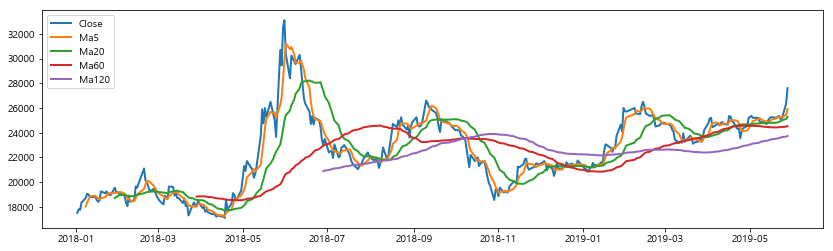

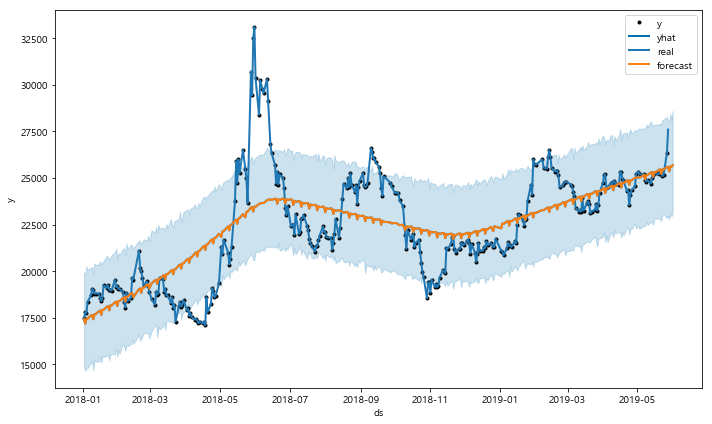

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


======= 기본정보 =========
             Open   High    Low  Close  Volume    Change      Ma5     Ma20  \
Date                                                                         
2019-05-27  24950  27900  24950  26350   32846  0.047714  25450.0  25112.0   
2019-05-28  26600  27800  26150  27600   47408  0.047438  25910.0  25275.0   

               Ma60    Ma120  
Date                          
2019-05-27  24487.0  23682.0  
2019-05-28  24533.0  23733.0  

==== 주가 예측 =====
            ds         trend    yhat_lower    yhat_upper   trend_lower  \
342 2019-05-28  25555.487041  22960.614909  28084.529378  25555.487041   
343 2019-05-29  25576.313393  22802.129223  27952.205206  25576.313393   
344 2019-05-30  25597.139744  23153.404772  28445.994955  25597.139744   
345 2019-05-31  25617.966095  22930.720752  28098.752769  25617.966095   
346 2019-06-01  25638.792446  23193.307455  28609.808262  25638.674198   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper

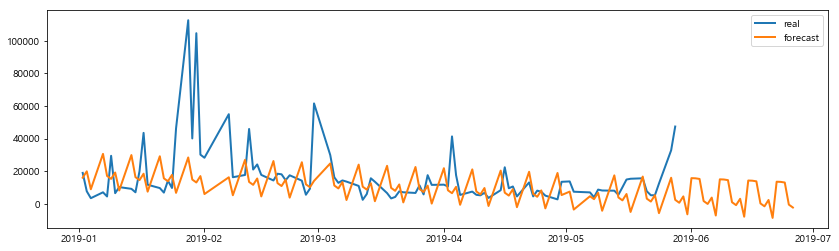

The Last Volume was 32846
Today volume : 47408  Tomorrow volume: -6386.875695340073



In [12]:
# 주가 흐름 분석 기본 설정

path = "c:/Windows/Fonts/malgun.ttf"
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

plt.rcParams['figure.figsize'] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid'] = True

day_trunc = datetime.today()-timedelta(days=1)
day_t = day_trunc.strftime('%Y-%m-%d')


SK = fdr.DataReader(target_code, '2018-01-01')

ma5 = SK['Close'].rolling(window=5).mean()
ma20 = SK['Close'].rolling(window=20).mean()
ma60 = SK['Close'].rolling(window=60).mean()
ma120 = SK['Close'].rolling(window=120).mean()

SK['Ma5'] = round(ma5, 0)
SK['Ma20'] = round(ma20, 0)
SK['Ma60'] = round(ma60, 0)
SK['Ma120'] = round(ma120, 0)

print("======= 주가 이동평균선 =========")

plt.plot(SK.index, SK['Close'], label="Close")
plt.plot(SK.index, SK['Ma5'], label="Ma5")
plt.plot(SK.index, SK['Ma20'], label="Ma20")
plt.plot(SK.index, SK['Ma60'], label="Ma60")
plt.plot(SK.index, SK['Ma120'], label="Ma120")

plt.legend(loc='best')
plt.grid()


SK_trunc = SK[:day_t]
df_SK = pd.DataFrame({'ds': SK_trunc.index, 'y' : SK_trunc['Close']})
df_SK.reset_index(inplace=True)
del df_SK['Date']
m = Prophet()
m.fit(df_SK);
future = m.make_future_dataframe(periods = 5)
forecast = m.predict(future)
m.plot(forecast);
plt.plot(SK.index, SK['Close'], label ='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend(loc='best')
plt.show()


Today = datetime.today().strftime('%Y-%m-%d')

print("======= 기본정보 =========")
print(SK.tail(2))
print("")
print('==== 주가 예측 =====')
print(forecast.tail(5))
tomorrow = (datetime.today()+timedelta(days=1)).strftime('%Y-%m-%d')
price_tomorrow = forecast[forecast['ds']== tomorrow].iloc[0,15]

print('')
print('--------------------Volume Analysis-----------------------')
SK_trunc2 = SK['2019-01-02':]
df_v = pd.DataFrame({'ds':SK_trunc.index, 'y':SK_trunc['Volume']})
df_v.reset_index(inplace=True)
del df_v['Date']

v = Prophet()
v.fit(df_v);
future_v = v.make_future_dataframe(periods=30)
forecast_v = v.predict(future_v)

forecast_v2 = forecast_v.set_index('ds')
forecast_v2 = forecast_v2['2019-01-02':]
tomorrow_volume = forecast_v[forecast_v['ds']== tomorrow].iloc[0,8]

plt.plot(SK_trunc2.index, SK_trunc2['Volume'], label='real')
plt.plot(forecast_v2.index, forecast_v2['yhat'], label="forecast")
plt.grid()
plt.legend()
plt.show()
print("The Last Volume was", df_v.tail(2).iloc[1,1])
print("Today volume :", SK.tail(10).iloc[9,4], " Tomorrow volume:", tomorrow_volume)
print('')

In [13]:
# 관련 주식의 이슈 파악을 위해서 뉴스를 체크한다. Key_word에 찾기 원하는 단어를 넣는다.

Key_words = '계룡건설 건설 산업 경기 전망'

MK = 'http://www.mk.co.kr/'
Joins = 'https://joongang.joins.com/'


In [14]:
# 매경 기사를 본다

from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import re
from selenium import webdriver
from konlpy.tag import Kkma
from sklearn.feature_extraction.text import CountVectorizer
import scipy as sp
import pandas as pd
from gensim.summarization.summarizer import summarize

k = Kkma()
Key_w_l = [k.morphs(Key_words) ]

# 매경 기사 추출

driver = webdriver.Chrome(executable_path='C:/Users/82108/Downloads/chromedriver_win32/chromedriver.exe')
driver.get(MK)
driver.find_element_by_xpath('//*[@id="gnbbx"]/div[3]/a').click()
driver.find_element_by_xpath('//*[@id="s_keyword"]').send_keys(Key_words)
driver.find_element_by_xpath('//*[@id="mkSearch"]/fieldset/label/input').click()

driver.window_handles
last_tab = driver.window_handles[-1]
driver.switch_to.window(window_name=last_tab)

url2 = driver.current_url
req2 = Request(url2)
res2 = urlopen(req2)
html2 = res2.read()
bs2 = BeautifulSoup(html2, 'html.parser')


# 매경 기사 타이틀 추출

MK_list = []
lists = bs2.find_all('span', class_='art_tit')
for list in lists:
    M = list.text.strip()
    M = re.sub('[\{\}\[\]\/?.,;…:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]', ' ', M)
    MK_list.append(M)

    
# 매경 기사 타이틀 날짜 추출
MK_list_day = []
j= 3
nk = j + len(lists)
for n in range(j,nk):
    m_day = driver.find_element_by_xpath('/html/body/center/table/tbody/tr[1]/td[1]/div[%s]/span[2]' %(n))
    MK_list_day.append(m_day.text.strip())


# 매경 기사 요약 추출    

lists_summary = bs2.find_all('div', class_='list_bx')
MK_summary = []
for list in lists_summary:
    add_sum = ''
    for a in list.find_all('a'):
        M= a.text.strip()
        M = re.sub('[\{\}\[\]\/?.,;…:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]', ' ', M)
        add_sum = add_sum + M
    MK_summary.append(add_sum)
    
# 기사 url 추출
lists_url = bs2.find_all('div', class_='list_bx')
MK_url3 = []
for list in lists_url:
    add = [a['href'] for a in list.find_all('a')]
    MK_url3.append(add[0])
    
print(MK_list)
print(MK_list_day)
print(MK_url3)

# 매경 기사 summary 텍스트 분석
content_tokens = [k.morphs(row) for row in MK_summary]

# 매경 가사를 pandas dataframe으로 검색어 출현회수를 계산

data = {}
for i, content in enumerate(content_tokens):
    digit=[]
    for a in Key_w_l[0]:
        if a in content:
            indicator = 1
            digit.append(indicator)
        else:
            indicator = 0
            digit.append(indicator)
    data[i] = digit
    
data

index = Key_w_l[0]

columns = []

for c in range(0, len(content_tokens)):
    columns.append(c)
    

print("==== 기사건수====")
print(columns)

df = pd.DataFrame(data,index=index, columns=columns)

print("=== Dataframe=====")
print(df)

print("=== 검색어 최대 출현 기사 번호=====")
max = - 1000
best_i = None
for i in columns:
    if df[i].sum() > max :
        max = df[i].sum()
        best_i = i 

print(best_i)


print("=== 정확도 반영 선택 기사 =====")

accuracy = 0.5
print("Accuracy =", accuracy)


Show_list = []
for i in columns:
    if df[i].sum()/len(index) > accuracy:
        Show_list.append(i)
        
print(Show_list)

print("=== 해당 기사 출력 =====")

for i in Show_list:
    print(MK_list[i])
    print(MK_list_day[i])
    print("========================")
    driver.get(MK_url3[i])
    art = driver.find_element_by_xpath('//*[@id="article_body"]/div')
    text= art.text.strip()
    print("========= 요약==========")
    print(summarize(text, ratio= 0.2))
    print("========== 본문 =========")
    print(text)
    print("========================")

INFO:summarizer.preprocessing.cleaner:'pattern' package not found; tag filters are not available for English


['5년만에  강남 위례  청약 전매 제한도 짧아', ' 지방정가 브리핑  다산신도시 특혜분양 의혹에 시끌', ' 관광 1번지 충청  대통령도 반한 힐링市 대전 관광에  익사이팅  입힌다', ' 극한기 온다  건설사 신사업으로 돌파구']
['2019년 04월 21일 17:35:25', '2019년 04월 05일 11:40:47', '2019년 03월 28일 04:05:01', '2019년 03월 17일 17:17:11']
['https://www.mk.co.kr/news/realestate/view/2019/04/247460/', 'https://www.mk.co.kr/news/society/view/2019/04/208860/', 'https://www.mk.co.kr/news/special-edition/view/2019/03/186824/', 'https://www.mk.co.kr/news/realestate/view/2019/03/159819/']
==== 기사건수====
[0, 1, 2, 3]
=== Dataframe=====
    0  1  2  3
계룡  0  0  0  0
건설  1  1  1  1
건설  1  1  1  1
산업  0  1  0  0
경기  1  0  0  1
전망  0  0  0  1
=== 검색어 최대 출현 기사 번호=====
3
=== 정확도 반영 선택 기사 =====
Accuracy = 0.5
[3]
=== 해당 기사 출력 =====
 극한기 온다  건설사 신사업으로 돌파구
2019년 03월 17일 17:17:11


INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(264 unique tokens: ['가운데', '건설사들이', '늘어나고', '시작하거나', '신사업을']...) from 28 documents (total 295 corpus positions)


========= 요약==========
아파트 브랜드 `이안`으로 알려진 대우산업개발은 14일 인천국제공항 입국장 면세점 사업자 입찰에 참여했다.
국내에서 처음으로 문을 여는 입국장 면세점 사업에 건설사로는 유일하게 신청서를 냈다.
또 우미건설은 부동산 분야에서 정보통신기술(ICT)을 활용해 새로운 시장을 만들고 있는 스타트업에도 꾸준히 투자하고 있다.
예배당을 많이 짓기로 유명한 서희건설은 남북 화해 무드를 타고 지뢰 제거 사업에 공을 들이고 있다.
김관수 대한건설협회 회원본부장은 "건설 경기가 호황을 지나 침체기로 들어서던 1990년대 말 건설사들이 유동성 확보와 포트폴리오 다변화 차원에서 고속도로 휴게소나 골프장 사업에 대거 진출한 적이 있다"며 "최근 건설 경기 하강으로 건설사 인력 구조조정이 계속되고 있어 유휴 인력의 활용이나 미래에 대한 불안감이 신사업 고민으로 이어지는 것 같다"고 설명했다.
========== 본문 =========
주택시장이 조정장으로 접어들면서 건설 경기 악화 우려가 커지는 가운데 이색적인 신사업을 시작하거나 키우려는 중견 건설사들이 늘어나고 있다.

서울 아파트 시장에서도 미분양이 속출하고 있지만 정부의 부동산 규제는 여전한 가운데 주택 경기에 민감한 중견 업체들이 고육지책으로 신사업에 눈을 돌린다는 분석도 나온다.

17일 건설업계에 따르면 중견 건설사들을 중심으로 주주총회를 앞두고 신사업을 정관의 사업 목적에 담거나 유휴자금으로 비(非)건설 분야에 투자하려는 움직임이 곳곳에서 포착되고 있다.

아파트 브랜드 `이안`으로 알려진 대우산업개발은 14일 인천국제공항 입국장 면세점 사업자 입찰에 참여했다.
국내에서 처음으로 문을 여는 입국장 면세점 사업에 건설사로는 유일하게 신청서를 냈다. 이 회사가 면세점 사업을 시도하는 데는 그간 `브리오슈도레`라는 프랑스 베이커리 사업을 지속적으로 벌여온 것이 계기가 됐다. 현재 중국 광저우를 비롯해 국내외에서 13개 매장을 운영 중인데, 매년 베이커리 사업을 확대한다는 계획이다. 한재준

In [15]:
# 중앙일보 기사 추출

driver = webdriver.Chrome(executable_path='C:/Users/82108/Downloads/chromedriver_win32/chromedriver.exe')
driver.get(Joins)
driver.find_element_by_xpath('//*[@id="btnOpenSearch"]').click()
driver.find_element_by_xpath('//*[@id="searchKeyword"]').send_keys(Key_words)
driver.find_element_by_xpath('//*[@id="btnSearch"]').click()


# 중앙일보 기사 타이틀 추출

joins_list = []
num_art_j = len(driver.find_elements_by_xpath('//*[@id="searchNewsArea"]/div[2]/ul/li/div/strong/a'))
for a in range(1, num_art_j+1):
    art_t_j = driver.find_element_by_xpath('//*[@id="searchNewsArea"]/div[2]/ul/li[%s]/div/strong/a' %(a))
    M = art_t_j.text.strip()
    M = re.sub('[\{\}\[\]\/?.,;…:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]', ' ', M)
    joins_list.append(M)
    
print(joins_list)


# 중앙일보 기사 날짜 추출

joins_list_day = []
for a in range(1, num_art_j+1):
    art_t_j_d = driver.find_element_by_xpath('//*[@id="searchNewsArea"]/div[2]/ul/li[%s]/div/span[2]/em[2]' %(a))
    joins_list_day.append(art_t_j_d.text.strip())

print(joins_list_day)


# 중앙일보 기사 요약 추출   

joins_sum = []
for a in range(1, num_art_j+1):
    art_sum = driver.find_element_by_xpath('//*[@id="searchNewsArea"]/div[2]/ul/li[%s]/div/span[1]' %(a))
    M = art_sum.text.strip()
    M = re.sub('[\{\}\[\]\/?.,;…:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]', ' ', M)
    joins_sum.append(M)
    

# 중일일보 기사 summary 텍스트 분석

content_tokens = [k.morphs(row) for row in joins_sum]

# 중앙일보 가사를 pandas dataframe으로 검색어 출현회수를 계산

data = {}
for i, content in enumerate(content_tokens):
    digit=[]
    for a in Key_w_l[0]:
        if a in content:
            indicator = 1
            digit.append(indicator)
        else:
            indicator = 0
            digit.append(indicator)
    data[i] = digit
    
data

index = Key_w_l[0]

columns = []

for c in range(0, len(content_tokens)):
    columns.append(c)
    

print("==== 기사건수====")
print(columns)

df = pd.DataFrame(data,index=index, columns=columns)

print("=== Dataframe=====")
print(df)


print("=== 정확도 반영 선택 기사 =====")

accuracy = 0.4
print("Accuracy =", accuracy)


Show_list = []
for i in columns:
    if (df[i].sum()/len(index)) >= accuracy:
        Show_list.append(i)


# 중앙일보 가사를 기사 추출

print("=== 해당 기사 출력 =====")

for n in Show_list:
    print(joins_list[n])
    print(joins_list_day[n])
    K = driver.find_element_by_xpath('//*[@id="searchNewsArea"]/div[2]/ul/li[%s]/div/strong/a' %(n+1))
    K.click()
    driver.window_handles
    first_tab = driver.window_handles[0]
    last_tab = driver.window_handles[-1]
    driver.switch_to.window(window_name = last_tab)
    art = driver.find_element_by_xpath('//*[@id="article_body"]')
    print("===== 기사 요약 =======")
    text = art.text.strip()
    print(summarize(text, ratio= 0.2))
    print("======기사 본문 ========")
    print(text)
    driver.close()
    driver.switch_to.window(window_name = first_tab)
    print("================")



[' 예타 면제 이후 건설·인프라株 띄우나', '10월→12월→1월  다시 3월 위례 또 분양연기 무슨 일이 ', ' 청약제도개편  불확실성 사라졌지만 위례·판교도 경기침체에 분양주저', ' 준강남  위례·판교 11 12월 2221가구 쏟아진다']
['2019.01.31 06:00', '2019.01.22 17:43', '2018.12.09 07:00', '2018.10.24 16:36']
==== 기사건수====
[0, 1, 2, 3]
=== Dataframe=====
    0  1  2  3
계룡  1  1  0  0
건설  1  1  0  0
건설  1  1  0  0
산업  1  0  0  0
경기  0  0  0  0
전망  0  0  1  0
=== 정확도 반영 선택 기사 =====
Accuracy = 0.4
=== 해당 기사 출력 =====
 예타 면제 이후 건설·인프라株 띄우나
2019.01.31 06:00


INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])


===== 기사 요약 =======


INFO:gensim.corpora.dictionary:built Dictionary(255 unique tokens: ['【서울', '경기가', '국가균형발전을', '기대감이', '나오고']...) from 30 documents (total 285 corpus positions)


【서울=뉴시스】김제이 기자 = 정부가 국가균형발전을 내세운 예비타당성 조사 면제를 제시함에 따라 경기가 부양될 수 있다는 기대감이 나오고 있다.
최대 2029년까지 진행될 것으로 전망된다.
예비타당성조사 면제로 인해 건설주와 인프라주에 대한 투자자들의 기대감이 한껏 고조돼 급등한 것으로 보인다.
특히 전문가들은 이번 선정 사업 중 '평택-오송간 고속철 복선화 사업'에서 예타가 면제된 것은 주목해야 한다고 강조했다.
선로용량이 확대되었을 때 KTX, SRT의 운행횟수가 2배 이상 증가될 것으로 전망된다.
채상욱 하나금융투자 연구원은 "정부의 예타 면제 주요 대상 사업지는 남부내륙철도(김천-거제), 평택-오송 복선화, 충북선 철도 고속화 등으로 이는 재정정책으로 연결돼 건자재, 특히 레미콘과 시멘트, 토목 중심 건설사에 수혜로 작용할 것"이라면서 "지난해 국내수주는 대한건협 기준 150조원, 올해는 160조원으로 전망 중인데, 예타 면제를 통해서 2020~2022년 동안 토목수주는 지속해서 55조원을 초과할 것으로 기대된다"고 내다봤다.
======기사 본문 ========
【서울=뉴시스】김제이 기자 = 정부가 국가균형발전을 내세운 예비타당성 조사 면제를 제시함에 따라 경기가 부양될 수 있다는 기대감이 나오고 있다. 이에 증권가도 '예타면제'로 인한 수혜주를 찾는데 분주하다. 예타 면제 대상이 대부분 도로·철도·공항 같은 토건 사업에 집중돼 건설주와 인프라주가 수혜 업종으로 점쳐지고 있다.

정부는 지난 29일 국무회의를 열고 '국가균형발전프로젝트'를 통해 각 지방자치단체(지자체)가 신청했던 예비타당성 조사면제 사업 중 23개 사업을 발표했다. 기존 지자체들이 신청했던 68조7000억원 규모의 32개 사업 가운데 전략적 방향성에 부합하는 사업들을 선정했다.

선정된 사업들은 국비와 지방재정 등 24조1000억원의 자금이 투입된다. 최대 2029년까지 진행될 것으로 전망된다. 이번 선정된 사업들은 올해부터 순차적으로 추진될 예정이며 향후 10년간 평균 1조9000억

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(194 unique tokens: ['【서울', '뉴시스】김가윤', '들어서도', '미뤄지고', '예정됐던']...) from 25 documents (total 247 corpus positions)


===== 기사 요약 =======
▲현대엔지니어링의 '힐스테이트 북위례' ▲계룡건설의 '계룡리슈빌(가칭)' ▲우미건설의 '우미린 1차 ▲중흥건설의 '중흥S클래스' 등이 당초 연말 분양을 계획했다가 올해로 일정을 미루며 대기 중이다.
현대엔지니어링이 분양하는 '힐스테이트 북위례'(A3-4a블록)은 3월 이후로 분양 일정을 미뤘다.
우미건설 관계자는 "택지에 위치한 유치원 부지 이동 문제로 지난해 교육영향 평가를 완료하느라 사업을 미뤘다"며 "다른 사업지도 있기 때문에 일정을 조율하면서 분양할 계획이지만 일단 3월로 예정하고 늦으면 4월에 분양한다"고 전했다.
계룡건설 관계자는 "지난해 11월말에 분양을 하려고 했는데 청약제도 개편으로 일정이 미뤄져 사업이 붕 뜨다보니 준비기간이 필요했다"며 "모델하우스 부지를 알아보는 것 등 현실적으로 1월에 하는 건 무리라고 생각했고 연초보다는 봄에 분양하는 게 계절적으로도 좋다"고 설명했다.
중흥건설 관계자는 "지난해에는 지방에 미분양이 있어 그걸 해소하고 사업을 하려고 분양을 미뤘다"며 "올 상반기에는 양주 옥정, 파주 운정 등에서 계획된 대형사업들이 있어 아예 가을로 일정을 잡았다"고 설명했다.
======기사 본문 ========
【서울=뉴시스】김가윤 기자 = 지난해 말 예정됐던 위례신도시 분양 일정이 올해 들어서도 3월 이후로 미뤄지고 있다.

분양가 상한제가 적용돼 '로또 청약'을 기대하는 수요자들의 관심이 쏠리고 있지만 건설사들은 쉽게 분양 나서지 못하고 있는 모습이다.

22일 부동산업계에 따르면 위례신도시는 분양가 상한제 적용 지역으로 분양가가 주변 시세보다 저렴하게 책정된다. 지난해 12월 분양한 '위례포레자이'(사진)는 3.3㎡당 평균 1820만원으로 주변 시세보다 70% 가량 낮은 분양가로 나오면서 큰 관심을 끌었다.

위례포레자이는 487가구 모집에 1순위 청약통장 6만3472개가 몰려 평균 경쟁률 130대 1을 기록했다. 최고 경쟁률은 726대 1이었다. 서울 송파·경기 성남·경기 하남에 걸쳐 조성되